In [6]:
# If first time running for this session
%run preliminary_features.py

Processing:  Dog_1
Processing:  Dog_2
Processing:  Dog_3
Processing:  Dog_4
Processing:  Patient_1
Processing:  Patient_2
Processing:  Patient_3
Processing:  Patient_4
Processing:  Patient_5
Processing:  Patient_6
Processing:  Patient_7
Processing:  Patient_8


In [1]:
#if DF is saved 
import data_exploration as de
DF=de.load_DF()

from data_exploration import get_srates
DF.head()

,alpha,beta,file,freq_corr,freq_eig,gamma,max_time,median_time,min_time,nchan,srate,std_time,subject,time_corr,time_eig,type
0,390.367207,943.660431,E:\ICG penn state seizure\clips\Dog_1\Dog_1_ic...,-0.067418,1.0,369.105601,3.237394,-0.016914,-3.327592,16,[399.609756098],1.0,Dog_1,-0.061596,1.0,early
1,390.367207,943.660431,E:\ICG penn state seizure\clips\Dog_1\Dog_1_ic...,-0.065755,1.0,369.105601,3.117021,-0.000077,-3.122083,16,[399.609756098],1.0,Dog_1,-0.064024,1.0,early
2,390.367207,943.660431,E:\ICG penn state seizure\clips\Dog_1\Dog_1_ic...,-0.068816,1.0,369.105601,2.811918,0.021250,-3.383781,16,[399.609756098],1.0,Dog_1,-0.057424,1.0,early
3,390.367207,943.660431,E:\ICG penn state seizure\clips\Dog_1\Dog_1_ic...,-0.069187,1.0,369.105601,3.073780,0.014264,-3.421808,16,[399.609756098],1.0,Dog_1,-0.061467,1.0,early
4,390.367207,943.660431,E:\ICG penn state seizure\clips\Dog_1\Dog_1_ic...,-0.069911,1.0,369.105601,3.181002,0.028282,-3.400048,16,[399.609756098],1.0,Dog_1,-0.062584,1.0,early


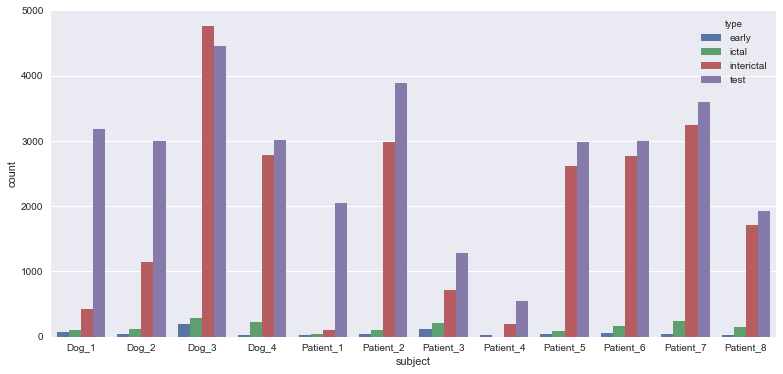

In [3]:
import matplotlib
%matplotlib inline
import seaborn
matplotlib.pyplot.figure(figsize=(13,6))
seaborn.countplot(x='subject',data=DF, hue='type')

C:\Users\Armand\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


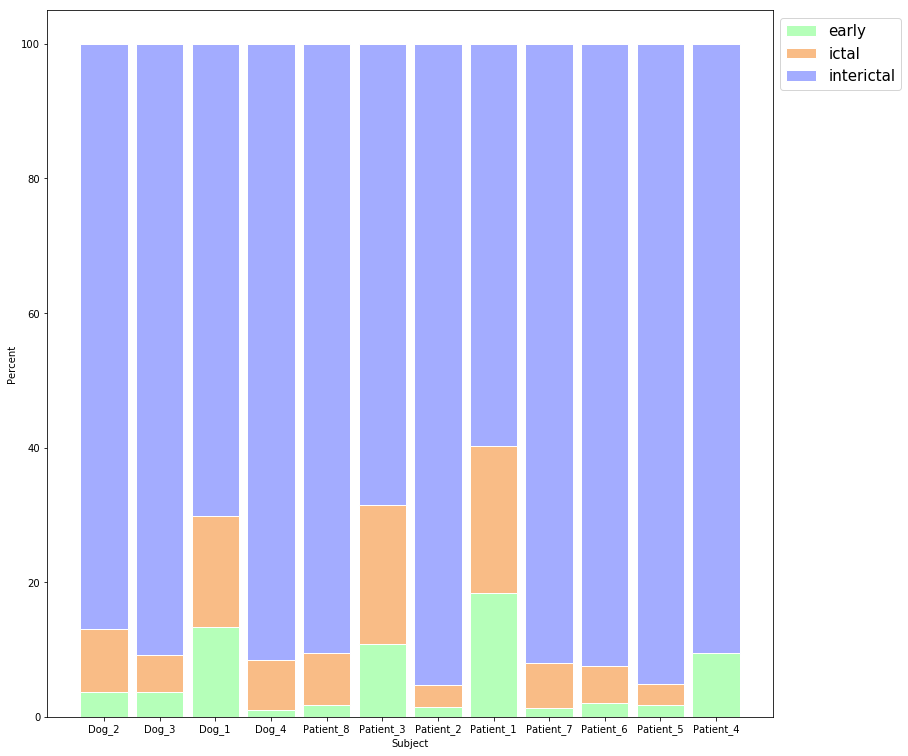

In [2]:
de.plot_stack_type(DF)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(0)
plt.figure(figsize=(18,13))
grid_list=list()
for i in range(6):
    for j in range(2):
        grid_list.append((i,j))

for subject,j in zip(list(set(DF.subject)),grid_list):
    
    plt.subplot2grid((6,2),j)
    seaborn.boxplot(x='subject',y='freq_corr',hue='type',data=DF.loc[(DF.type!='test') & (DF.subject==subject)])
    plt.ylim((np.percentile(DF.loc[(DF.type!='test') & (DF.subject==subject)].freq_corr,5),
              np.percentile(DF.loc[(DF.type!='test') & (DF.subject==subject)].freq_corr,95)))

NameError: name 'DF' is not defined

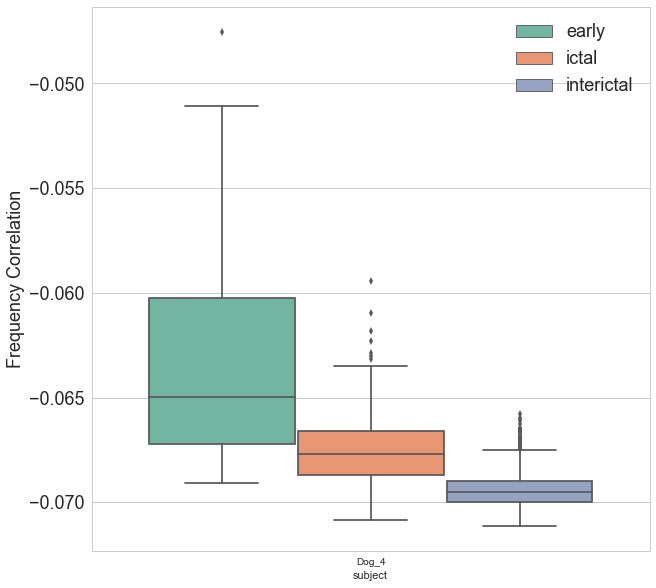

In [111]:
seaborn.set_style('whitegrid')
plt.figure(figsize=(10,10))
seaborn.boxplot(x='subject',y='freq_corr',hue='type',data=DF.loc[(DF.type!='test') & (DF.subject=='Dog_4')],palette='Set2')
plt.ylabel('Frequency Correlation',fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# GridSearch results, and feature importance

In [64]:
import pickle
from sklearn.model_selection import GridSearchCV
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
gs=pickle.load(open('Dog_1_gridsearch.pickle','rb'))
clf=pickle.load(open('Dog_1_learner.pickle','rb'))
gsdf=pandas.DataFrame(gs.cv_results_)
gsdf.param_bootstrap=gsdf.param_bootstrap.astype(int)
print(gsdf.mean_test_score.as_matrix().shape)

(126L,)


In [100]:
#measure correlation between parameters and score

import scipy.signal as sig
bootstrap_corr=np.corrcoef(gsdf.mean_test_score.as_matrix(),gsdf.param_bootstrap.as_matrix())[0][1]
sample_split_corr=np.corrcoef(gsdf.mean_test_score.astype(float),gsdf.param_min_samples_split.astype(float))[0][1]
n_estimators_corr=np.corrcoef(gsdf.mean_test_score.astype(float),gsdf.param_n_estimators.astype(float))[0][1]

print 'Bootstrap Correlation:',bootstrap_corr
print "Sample Split Correlation:",sample_split_corr
print "N_Estimators Correlation:",n_estimators_corr




Bootstrap Correlation: -0.314288279915
Sample Split Correlation: -0.912616656875
N_Estimators Correlation: 0.0711277022803


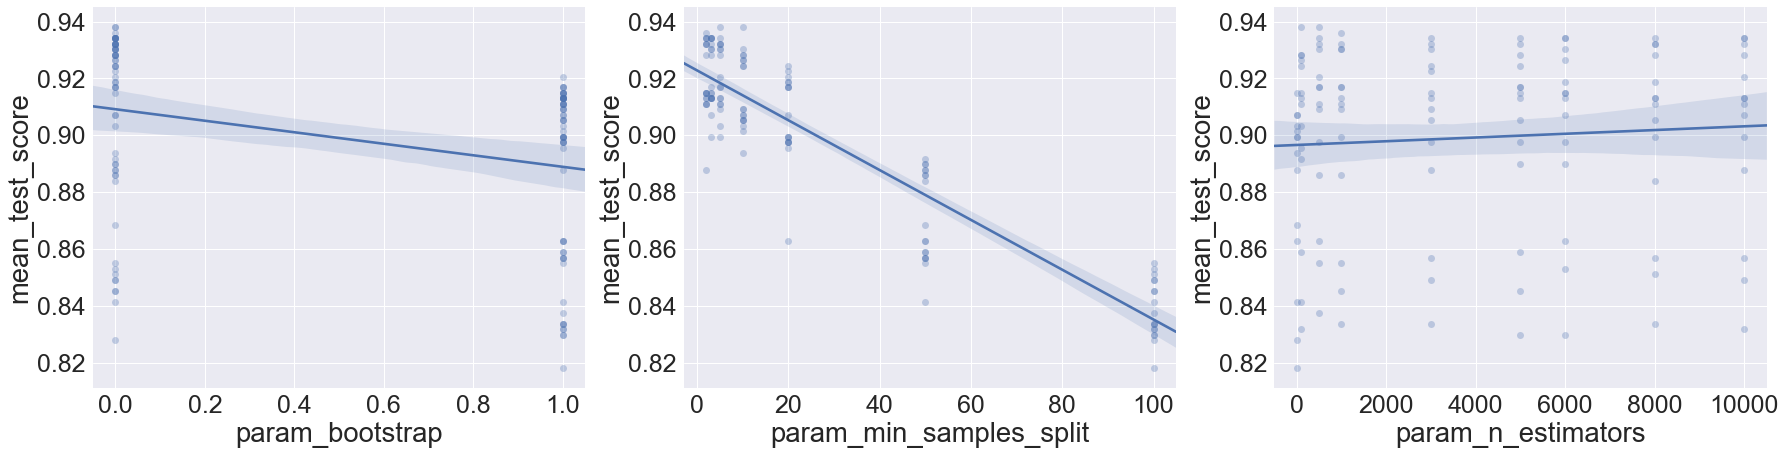

In [126]:
#plt.rc('xtick',labelsize=14)
#plt.rc('ytick',labelsize=14)

sns.set(font_scale=2.5)
plt.figure(figsize=(30,7))
ax=plt.subplot(1,3,1)
sns.regplot(x='param_bootstrap',y='mean_test_score',data=gsdf, scatter_kws={'alpha':0.3})
plt.subplot(1,3,2)
sns.regplot(x=gsdf.param_min_samples_split.astype(float),y=gsdf.mean_test_score.astype(float), scatter_kws={'alpha':0.3})
plt.subplot(1,3,3)
sns.regplot(x=gsdf.param_n_estimators.astype(float),y=gsdf.mean_test_score.astype(float), scatter_kws={'alpha':0.3})

272
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


136

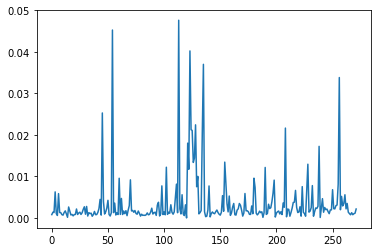

In [24]:
plt.plot(clf.feature_importances_)
print len(clf.feature_importances_)
print range(1,17)
sum(range(1,17))


In [127]:
print 'Sum of Frequency importances:',sum(clf.feature_importances_[:135])
print 'Sum of Time importances:',sum(clf.feature_importances_[136:])


Sum of Frequency importances: 0.541973339566
Sum of Time importances: 0.421039101145
